## 1. We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]
## 2. Fit a logistic regression model and measure the accuracy on the test set.
[Hint: Refer to Linear Models section in scikit-learn]
## 3. Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]
## 4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.
[Hint: Identify correlated variable pairs and remove one among them]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfVoice = pd.read_csv("voice.csv")

In [4]:
dfVoice.shape

(3168, 21)

In [5]:
dfVoice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
dfVoice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [9]:
dfVoice.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [125]:
dfVoice.label.unique()

array([1, 0], dtype=int64)

In [117]:
dfVoice.shape

(3168, 21)

In [11]:
dfVoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [126]:
dfVoice['label']=dfVoice['label'].map({"male":1,"female":0})

In [128]:
dfVoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       0 non-null float64
dtypes: float64(21)
memory usage: 519.8 KB


In [13]:
dfVoice.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
698,0.162065,0.062205,0.174971,0.104100,0.214705,0.110606,2.284962,8.903530,0.910273,0.421144,...,0.162065,0.095149,0.050761,0.125000,0.270415,0.092773,0.844727,0.751953,0.429221,1
282,0.165823,0.076978,0.182063,0.107825,0.230404,0.122578,8.389658,181.136243,0.962937,0.710752,...,0.165823,0.129392,0.017758,0.246154,0.755580,0.007812,4.835938,4.828125,0.270793,1
2252,0.201867,0.044053,0.199402,0.177024,0.235608,0.058583,1.537239,4.748072,0.898281,0.230860,...,0.201867,0.161075,0.015920,0.275862,0.261914,0.164062,1.132812,0.968750,0.089146,0
219,0.185592,0.061366,0.205243,0.128673,0.237864,0.109191,1.245637,3.901684,0.924608,0.409220,...,0.185592,0.117565,0.015779,0.271186,0.384943,0.117188,0.601562,0.484375,0.358065,1
2135,0.180866,0.032391,0.182719,0.168973,0.194139,0.025166,3.251270,15.136987,0.824579,0.222110,...,0.180866,0.177221,0.017897,0.250000,0.372098,0.007812,6.570312,6.562500,0.060539,0


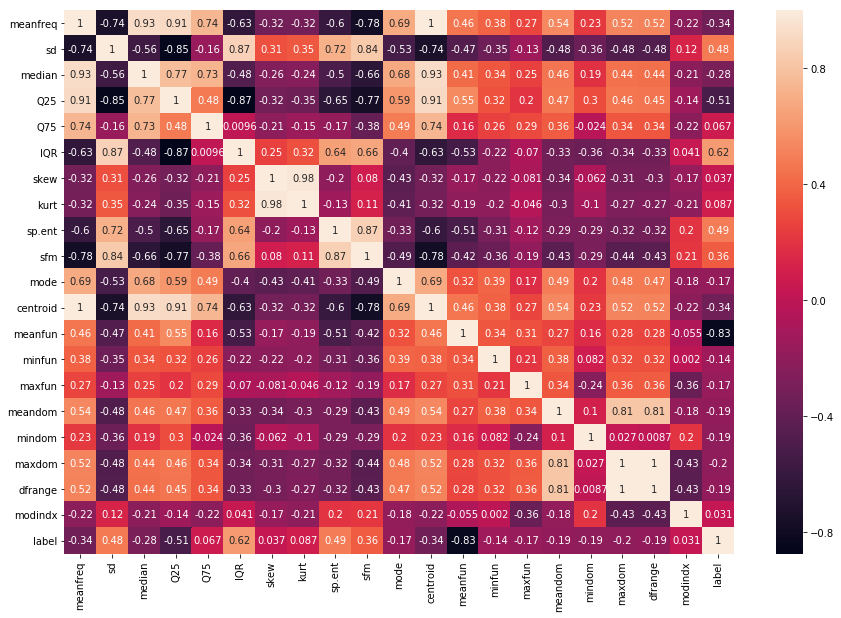

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(dfVoice.corr(),annot=True)

In [87]:
features = ['sd','IQR','Q25','sp.ent','sfm','meanfun']
X=dfVoice[features]

In [88]:
X.sample(5)

,sd,IQR,Q25,sp.ent,sfm,meanfun
702,0.062903,0.102074,0.097860,0.895739,0.409561,0.095919
1900,0.072019,0.066818,0.183750,0.915646,0.471817,0.182011
2338,0.031233,0.033357,0.213285,0.812386,0.153970,0.196945
547,0.067962,0.127154,0.091223,0.944387,0.625180,0.081690
2989,0.060806,0.063009,0.142237,0.924981,0.528634,0.144304


In [89]:
y= dfVoice.label

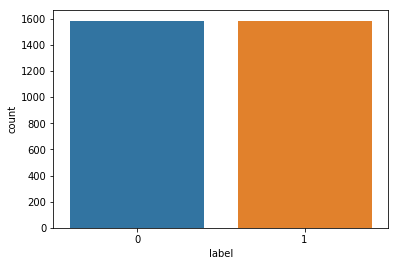

In [90]:
sns.countplot(dfVoice['label'])
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
trainX, testX, trainy, testy = train_test_split(X,y,test_size=0.2)

In [94]:
trainX.sample(5)

,sd,IQR,Q25,sp.ent,sfm,meanfun
1121,0.065304,0.123478,0.138696,0.886977,0.396902,0.147963
2350,0.032266,0.028226,0.212258,0.824446,0.169864,0.187533
340,0.065073,0.102506,0.096414,0.913547,0.531077,0.100200
2795,0.042357,0.053096,0.162193,0.873810,0.296574,0.156115
629,0.076228,0.132957,0.072657,0.974481,0.778517,0.107425


In [95]:
trainy.sample(5)

1340    1
1818    0
2054    0
1515    1
1676    0
Name: label, dtype: int64

In [96]:
testy.sample(5)

1039    1
1152    1
2306    0
1615    0
2536    0
Name: label, dtype: int64

In [97]:
lrm = LogisticRegression(random_state=5)

In [98]:
lrm.fit(trainX,trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
pred_y = lrm.predict(testX)

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(testy,pred_y)

0.9116719242902208

In [102]:
newdf = pd.DataFrame({"Test":testy,"Prediction":pred_y})

In [106]:
X_all = dfVoice.drop('label',axis=1)

In [107]:
train_X, test_X, train_y, test_y = train_test_split(X_all,y,test_size=0.2) 

In [108]:
lrm.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [109]:
newpred_y = lrm.predict(test_X)

In [110]:
accuracy_score(test_y,newpred_y)

0.919558359621451